# Tratamento de Dados de Satélite
**Equipe:** Daniel, Jones, Kleberson, Murilo

## Apresentação
### O Telescópio Kepler e a Descoberta de Exoplanetas

#### Introdução
- O Telescópio Espacial Kepler, lançado pela NASA em 2009, foi projetado para descobrir exoplanetas, <br>
  ou seja, planetas que orbitam estrelas fora do nosso sistema solar.
- A missão Kepler teve como objetivo principal explorar a estrutura e a diversidade dos sistemas <br>
planetários, contribuindo significativamente para a nossa compreensão do universo.

#### Objetivos da Missão Kepler
- **Exploração da Diversidade Planetária**: Investigar a variedade de planetas e suas características.
- **Identificação de Exoplanetas**: Detectar planetas em zonas habitáveis, onde a vida poderia existir.
- **Coleta de Dados**: Fornecer dados extensivos que apoiem futuras missões da NASA e pesquisas científicas.

#### O Conjunto de Dados
- O conjunto de dados contém informações sobre aproximadamente **3.373 exoplanetas confirmados**.
- Inclui dados coletados durante as missões Kepler e K2, abrangendo vários anos de observação.
- **Informações Disponíveis**:
  - Nome da estrela hospedeira
  - Características dos planetas (tamanho, massa, composição)
  - Parâmetros orbitais (período orbital, distância da estrela)
  - Métodos de descoberta (transito, velocidade radial)
  - Propriedades estelares (tipo de estrela, temperatura)

#### Importância dos Dados
- Os dados do Kepler são cruciais para entender a formação e evolução dos sistemas planetários.
- Permitem a análise estatística da distribuição de exoplanetas em diferentes tipos de estrelas e suas características.
- A pesquisa com esses dados pode revelar padrões que ajudam a identificar quais sistemas planetários têm maior probabilidade de abrigar vida.



## Análise dos Dados

**Bibliotecas necessárias**

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

**Resultados obtidos**

In [9]:
# 1) Lê o CSV para um DataFrame
df_original = pd.read_csv('data/planets.csv')

# Suponha que a coluna que você quer checar se chama 'col_importante'

# 2) Máscara para filtrar os dados mantendo só as linhas onde 'col_importante' NÃO é NaN
mask = (
    (df_original['pl_hostname'] != '') &
    (df_original['pl_dens'].notna()) &
    (df_original['pl_orbeccen'].notna()) &
    (df_original['pl_bmassj'] != '') &
    (df_original['pl_radj'].notna()) &
    (df_original['pl_orbper'].notna()) &
    (df_original['st_teff'].notna())
)

"""
Alternativa usando dropna para as colunas numéricas e filtragem específica para as strings:

python

Copiar código
# 1) remove linhas com NaN nas colunas numéricas
df2 = df.dropna(subset=['pl_dens','pl_radj','pl_orbper','st_teff'])

# 2) filtra as colunas de string para não-vazias
mask_str = (df2['pl_hostname'].str.strip() != '') & (df2['pl_bmassj'].str.strip() != '')
df_filtrado = df2[mask_str]
Assim você garante que só sobram linhas em que todas as colunas que você listou estejam efetivamente preenchidas.
"""

df_filtrado = df_original[mask]

# Alternativamente, você também pode "dropar" as linhas faltantes diretamente:
# df.dropna(subset=['col_importante'], inplace=True)

# 3) A partir daqui use df_filtrado para suas análises
# print(df_filtrado.head(5))
print(f"População que será utilizada nos testes: {len(df_filtrado)}")

População que será utilizada nos testes: 291


### Proporções

**Planetas cujo raio se assemelha ao da Terra**

Como o raio de cada planeta está medido em **raios de júpiter**, faremos uma conversão do raio da Terra:

$R_{Terra} = 6378,1~km = \frac{6378,1}{69911} \approx 0,09123$ raios de júpiter

Cerca de 42 planetas possuem o raio semelhante ao da Terra!
Proporção dos planetas encontrados: 0.1105263
Média do raio dos planetas: 0.1258810
Variância (amost.): 0.0013750
Desvio-padrão (amost.): 0.0370808


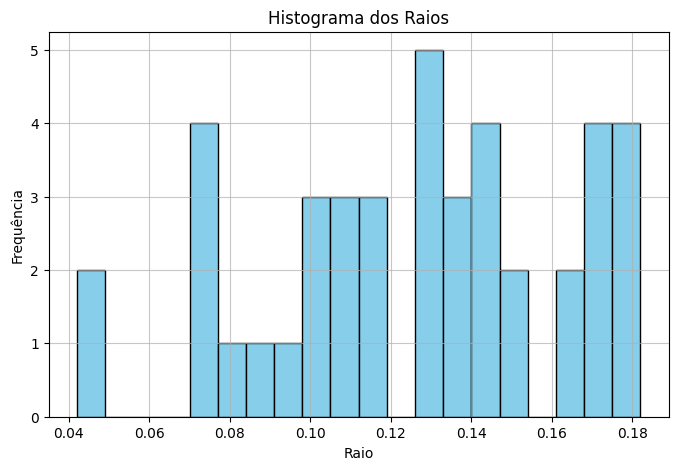

Proporção (planetas menores que a Terra): 2.11%
Proporção (planetas maiores que a Terra): 97.89%

Proporção com raio médio de todos os planetas: 0.13335


In [5]:
# Parâmetros
coluna = "pl_radj"
x      = 0.09123     # valor alvo (float)
tol    = 0.1        # tolerância, ex.: ±0.1

mask_r = (df_filtrado[coluna] - x).abs() <= tol
df_r = df_filtrado[mask_r]

# Média
media = df_r[coluna].mean()

# Variância amostral
variancia_amostral = df_r[coluna].var(ddof=1)

# Desvio padrão
desvio_amostral = df_r[coluna].std(ddof=1)

print(f"Cerca de {len(df_r[coluna])} planetas possuem o raio semelhante ao da Terra!")
# Mostra quantos, dos planetas encontrados, possuem raio semelhante ao da Terra
print(f"Proporção dos planetas encontrados: {len(df_r)/len(df_filtrado) :.7f}")
print(f"Média do raio dos planetas: {media:.7f}")
print(f"Variância (amost.): {variancia_amostral:.7f}")
print(f"Desvio-padrão (amost.): {desvio_amostral:.7f}")

# --- plotando histograma ---
plt.figure(figsize=(8, 5))

df_r[coluna].plot.hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma dos Raios")
plt.xlabel("Raio")
plt.ylabel("Frequência")
plt.grid(alpha=0.7)
plt.show()

# df_fitrado: dados na tabela que possuem um valor de raio
menores = (df_filtrado[coluna] < x).mean() * 100
maiores = (df_filtrado[coluna] > x).mean() * 100
print(f"Proporção (planetas menores que a Terra): {menores:.2f}%")
print(f"Proporção (planetas maiores que a Terra): {maiores:.2f}%\n")
print(f"Proporção com raio médio de todos os planetas: {media/df_filtrado[coluna].mean():.5f}")

Calculando IC de 95% para a média dos raio:

$n = 380, \alpha = 0,05, \hat{p} \approxeq 0,13335$

$IC: 0,13335 \pm z_{0,025} \cdot \sqrt{\frac{0,13335 \cdot (1-0,13335)}{380}} $

In [6]:
# Média dos raios semelhantes à terra / Média dos raios de todos os planetas
p_hat = media/df_filtrado[coluna].mean()
alpha = 0.05
z = norm.ppf(1 - alpha/2)

# Margem de erro
se = math.sqrt(p_hat * (1 - p_hat) / len(df_filtrado))
me = z * se

ic_lower = p_hat - me
ic_upper = p_hat + me

print(f"IC 95% (Normal): [{ic_lower:.4f}, {ic_upper:.4f}]")

IC 95% (Normal): [0.0992, 0.1675]


Estamos 95% confiantes de que a proporção populacional verdadeira está no intervalo $[0,0992;~0,1675]$.

**Planetas cujo a massa se assemelha ao da  Terra**

Como o massa de cada planeta também está medido em **raios de júpiter**, faremos uma conversão da massa da Terra:

$M_{Terra} = 5,9722 \cdot 10^{24}~kg = \frac{5,9722 \cdot 10^{24}}{1,898 \cdot 10^{27}} \approx 0,003147$ massas de júpiter

Cerca de 32 planetas possuem massa semelhante a da Terra!
Proporção dos planetas encontrados: 8.42%
Média da massa dos planetas: 0.0075656
Variância (amost.): 0.0000204
Desvio-padrão (amost.): 0.0045172


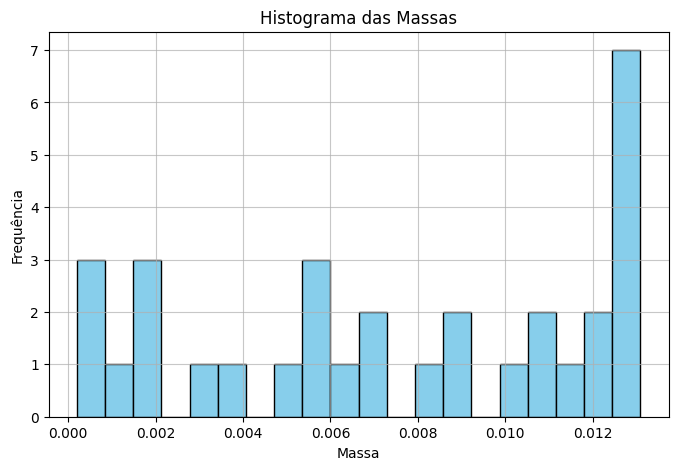

Proporção (planetas menos massivo que a Terra): 25.00%
Proporção (planetas mais massivo que a Terra): 75.00%
Proporção com raio médio de todos os planetas: 0.00605


In [7]:
# Parâmetros
coluna = "pl_bmassj"
x      = 0.003147     # valor alvo (float)
tol    = 0.01       # tolerância, ex.: ±0.01

mask_m = (df_filtrado[coluna] - x).abs() <= tol
df_m = df_filtrado[mask_m]

# Média
media = df_m[coluna].mean()

# Variância amostral
variancia_amostral = df_m[coluna].var(ddof=1)

# Desvio padrão
desvio_amostral = df_m[coluna].std(ddof=1)
 
print(f"Cerca de {len(df_m[coluna])} planetas possuem massa semelhante a da Terra!")
print(f"Proporção dos planetas encontrados: {(len(df_m)/len(df_filtrado)) * 100 :.2f}%")
print(f"Média da massa dos planetas: {media:.7f}")
print(f"Variância (amost.): {variancia_amostral:.7f}")
print(f"Desvio-padrão (amost.): {desvio_amostral:.7f}")
 
serie = df_m[coluna]
 
# --- plotando histograma ---
plt.figure(figsize=(8, 5))
 
serie.plot.hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma das Massas")
plt.xlabel("Massa")
plt.ylabel("Frequência")
plt.grid(alpha=0.7)
plt.show()

menores = (df_m[coluna] < x).mean() * 100
print(f"Proporção (planetas menos massivo que a Terra): {menores:.2f}%")
print(f"Proporção (planetas mais massivo que a Terra): {100 - menores:.2f}%")
print(f"Proporção com raio médio de todos os planetas: {media/df_filtrado[coluna].mean():.5f}")

Calculando IC de 95% para a média das massa:

$n = 380, \alpha = 0,05, \hat{p} \approxeq 0,00605$

$IC: 0,00605 \pm z_{0,025} \cdot \sqrt{\frac{0,00605 \cdot (1-0,00605)}{380}} $

In [8]:
# Média das massa semelhantes à terra / Média das massa de todos os planetas
p_hat = media/df_filtrado[coluna].mean()
alpha = 0.05
z = norm.ppf(1 - alpha/2)

# Margem de erro
se = math.sqrt(p_hat * (1 - p_hat) / len(df_filtrado))
me = z * se

ic_lower = p_hat - me
ic_upper = p_hat + me

print(f"IC 95% (Normal): [{ic_lower:.4f}, {ic_upper:.4f}]")

IC 95% (Normal): [-0.0017, 0.0139]


Com isso, concluímos que a massa populacional dos planetas semelhantes a Terra está no intervalo $[-0,0017;~0,0139]$.

**Planetas cujo a excentridade orbital(achatamento da órbita) se assemelha a da  Terra**

$e_{Terra} \approx 0,0167$ 

Cerca de 31 planetas possuem excentridade orbital semelhante a da Terra!
Proporção dos planetas encontrados: 10.65%
Média da excentridade dos planetas: 0.0155613
Variância (amost.): 0.0000300
Desvio-padrão (amost.): 0.0054778


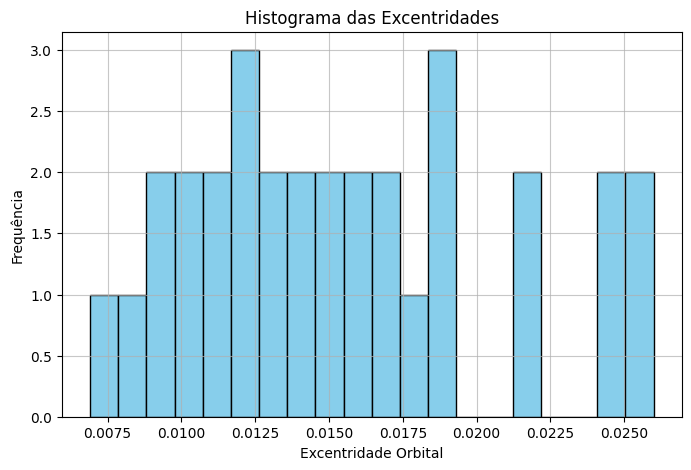

Proporção (planetas com excentridade menor que a Terra): 19.05%
Proporção (planetas com excentridade maior que a Terra): 80.95%
Proporção com excentridade média de todos os planetas: 0.19751


In [10]:
# Parâmetros
coluna = "pl_orbeccen"
x      = 0.0167     # valor alvo (float)
tol    = 0.01       # tolerância, ex.: ±0.01

mask_e = (df_filtrado[coluna] - x).abs() <= tol
df_e = df_filtrado[mask_e]

# Média
media = df_e[coluna].mean()

# Variância amostral
variancia_amostral = df_e[coluna].var(ddof=1)

# Desvio padrão
desvio_amostral = df_e[coluna].std(ddof=1)
 
print(f"Cerca de {len(df_e[coluna])} planetas possuem excentridade orbital semelhante a da Terra!")
print(f"Proporção dos planetas encontrados: {(len(df_e)/len(df_filtrado)) * 100 :.2f}%")
print(f"Média da excentridade dos planetas: {media:.7f}")
print(f"Variância (amost.): {variancia_amostral:.7f}")
print(f"Desvio-padrão (amost.): {desvio_amostral:.7f}")
 
serie = df_e[coluna]
 
# --- plotando histograma ---
plt.figure(figsize=(8, 5))
 
serie.plot.hist(bins=20, color="skyblue", edgecolor="black")
plt.title("Histograma das Excentridades")
plt.xlabel("Excentridade Orbital")
plt.ylabel("Frequência")
plt.grid(alpha=0.7)
plt.show()

menores = (df_r[coluna] < x).mean() * 100
print(f"Proporção (planetas com excentridade menor que a Terra): {menores:.2f}%")
print(f"Proporção (planetas com excentridade maior que a Terra): {100 - menores:.2f}%")
print(f"Proporção com excentridade média de todos os planetas: {media/df_filtrado[coluna].mean():.5f}")

Calculando IC de 95% para a média das massa:

$n = 380, \alpha = 0,05, \hat{p} \approxeq 0,19751$

$IC: 0,19751 \pm z_{0,025} \cdot \sqrt{\frac{0,19751 \cdot (1-0,19751)}{380}} $

In [11]:
################# IC de Excentridade #################

# Média das excentridades semelhantes à terra / Média das excentricidades orbitais de todos os planetas
p_hat = media/df_filtrado[coluna].mean()
alpha = 0.05
z = norm.ppf(1 - alpha/2)

# Margem de erro
se = math.sqrt(p_hat * (1 - p_hat) / len(df_filtrado))
me = z * se

ic_lower = p_hat - me
ic_upper = p_hat + me

print(f"IC 95% (Normal): [{ic_lower:.4f}, {ic_upper:.4f}]")

IC 95% (Normal): [0.1518, 0.2433]


Com isso, concluímos que a excentridade populacional dos planetas semelhantes a Terra está no intervalo $[0,1518;~0,2433]$.

## Conclusão
- O Telescópio Kepler revolucionou nossa compreensão dos exoplanetas e da diversidade dos sistemas planetários.
- O conjunto de dados disponível oferece uma rica fonte de informações para pesquisas futuras e análises estatísticas.
- Através do uso de ferramentas como Jupyter Notebooks, podemos explorar e visualizar esses dados, contribuindo para o avanço da astronomia e da astrobiologia.